# Importing Necessary Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

# Understanding the data

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Cleaning the data

In [8]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
df = df.drop(["parental level of education","lunch"],axis = 1)

In [11]:
df

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
0,female,group B,none,72,72,74
1,female,group C,completed,69,90,88
2,female,group B,none,90,95,93
3,male,group A,none,47,57,44
4,male,group C,none,76,78,75
...,...,...,...,...,...,...
995,female,group E,completed,88,99,95
996,male,group C,none,62,55,55
997,female,group C,completed,59,71,65
998,female,group D,completed,68,78,77


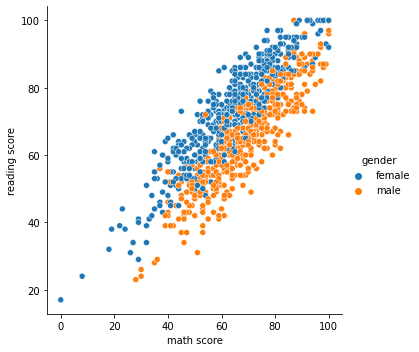

In [12]:
sns.relplot(x = 'math score', y = 'reading score', hue = 'gender',data = df)

<AxesSubplot:xlabel='math score', ylabel='Density'>

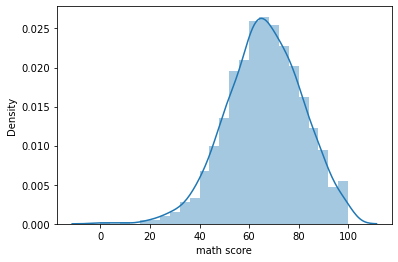

In [13]:
sns.distplot(df["math score"])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

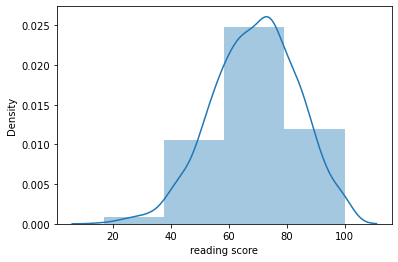

In [14]:
sns.distplot(df["reading score"],bins = 4)

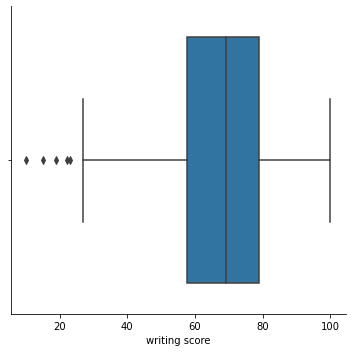

In [15]:
sns.catplot(x="writing score",kind="box",data = df)

# Task 1:- Comparing the Completion rate of Test preparation course of male and Female 


In [16]:
fem = df[(df["gender"] == 'female') & (df["test preparation course"] == "completed")]
fem

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
1,female,group C,completed,69,90,88
6,female,group B,completed,88,95,92
21,female,group B,completed,65,75,70
38,female,group D,completed,75,90,88
46,female,group A,completed,55,65,62
...,...,...,...,...,...,...
989,female,group D,completed,67,86,83
991,female,group B,completed,65,82,78
995,female,group E,completed,88,99,95
997,female,group C,completed,59,71,65


In [17]:
fem.shape

(184, 6)

In [18]:
mal = df[(df["gender"] == 'male') & (df["test preparation course"] == "completed")]
mal

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
8,male,group D,completed,64,64,67
13,male,group A,completed,78,72,70
18,male,group C,completed,46,42,46
24,male,group D,completed,74,71,80
35,male,group E,completed,81,81,79
...,...,...,...,...,...,...
976,male,group B,completed,60,62,60
978,male,group D,completed,55,41,48
982,male,group B,completed,79,85,86
987,male,group E,completed,81,75,76


In [19]:
mal.shape

(174, 6)

In [20]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [21]:
(174/482) * 100

36.09958506224066

In [22]:
(184/518) * 100

35.521235521235525

# Task 1 Conclusion :- Male rate is higher than female rate in Course completion

# Task 2 :- Find the Maximum average score as well as return in a seperate updated dataframe

In [23]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = round(df['total score'] / 3, 1)
df

,gender,race/ethnicity,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,none,72,72,74,218,72.7
1,female,group C,completed,69,90,88,247,82.3
2,female,group B,none,90,95,93,278,92.7
3,male,group A,none,47,57,44,148,49.3
4,male,group C,none,76,78,75,229,76.3
...,...,...,...,...,...,...,...,...
995,female,group E,completed,88,99,95,282,94.0
996,male,group C,none,62,55,55,172,57.3
997,female,group C,completed,59,71,65,195,65.0
998,female,group D,completed,68,78,77,223,74.3


In [24]:
df["average score"].describe()

count    1000.000000
mean       67.769800
std        14.257197
min         9.000000
25%        58.300000
50%        68.300000
75%        77.700000
max       100.000000
Name: average score, dtype: float64

In [25]:
task2 = df[df["average score"] == 100.00]
task2

,gender,race/ethnicity,test preparation course,math score,reading score,writing score,total score,average score
458,female,group E,none,100,100,100,300,100.0
916,male,group E,completed,100,100,100,300,100.0
962,female,group E,none,100,100,100,300,100.0


# Task 2 Conclusion :- The Max Average score is 100.0 and there are 3 persons with 100 avg score and all of them belongs to [Group E]

# Task 3 :- Find Number of students who failed in examination

In [26]:
df['Math_Result'] = np.where(df['math score']>=35,'Pass','Fail')
df['reading_Result'] = np.where(df['math score']>=35,'Pass','Fail')
df['writing_Result'] = np.where(df['math score']>=35,'Pass','Fail')

df.columns
df['Result'] = df.apply(lambda x: 'Passed' if x['Math_Result'] == 'Pass' and x['reading_Result'] == 'Pass' and x['writing_Result'] == 'Pass' else 'Failed'
                        ,axis=1)

In [27]:
df

,gender,race/ethnicity,test preparation course,math score,reading score,writing score,total score,average score,Math_Result,reading_Result,writing_Result,Result
0,female,group B,none,72,72,74,218,72.7,Pass,Pass,Pass,Passed
1,female,group C,completed,69,90,88,247,82.3,Pass,Pass,Pass,Passed
2,female,group B,none,90,95,93,278,92.7,Pass,Pass,Pass,Passed
3,male,group A,none,47,57,44,148,49.3,Pass,Pass,Pass,Passed
4,male,group C,none,76,78,75,229,76.3,Pass,Pass,Pass,Passed
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,completed,88,99,95,282,94.0,Pass,Pass,Pass,Passed
996,male,group C,none,62,55,55,172,57.3,Pass,Pass,Pass,Passed
997,female,group C,completed,59,71,65,195,65.0,Pass,Pass,Pass,Passed
998,female,group D,completed,68,78,77,223,74.3,Pass,Pass,Pass,Passed


In [32]:
df["Result"].value_counts()

Passed    978
Failed     22
Name: Result, dtype: int64

# Task 3 Conclusion :- So out of 1000 students only 22 students failed in examination




# Task 4 :- Ploting Categorical Features with Result

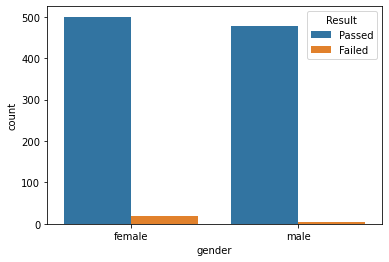

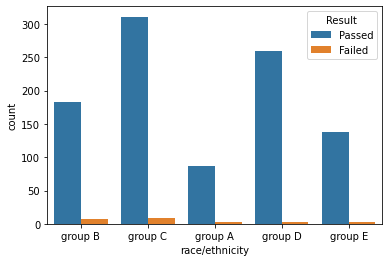

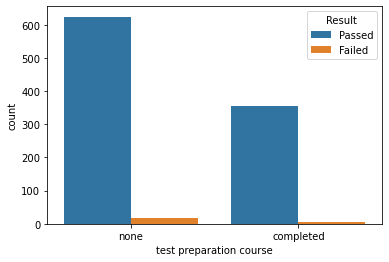

In [30]:
cats = [col for col in df.columns if df[col].dtype =='object']
nums = [col for col in df.columns if df[col].dtype =='int64']


pltcats =  cats[:3]
for indx,cat in enumerate(pltcats):
        
    rt = sns.countplot(data=df,x=cat,hue='Result')

    text_ln = len(str(rt.get_xticklabels()[0]))
    if text_ln > 25:
        rt.set_xticklabels(rt.get_xticklabels(),rotation = 30)
    else:
        pass
    plt.show()